In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importation of libraries

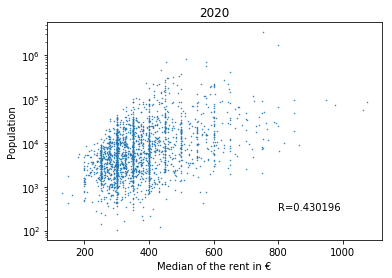

In [7]:
# modification of the population data set
i=20
pob=pd.read_excel("pobmun/pobmun"+str(i)+".xlsx") # reading
pob=pob.drop(columns=["Unnamed: 1","Unnamed: 3","Unnamed: 5","Unnamed: 6"]) # elimination of not useful columns
pob=pob.rename(columns={"Cifras de población resultantes de la Revisión del Padrón municipal a 1 de enero de 20"+str(i): "code", "Unnamed: 2": "cmun","Unnamed: 4": "pob"+str(i)})
# renaming of columns
pob["code"]=pob["code"].astype(str)+pob["cmun"].astype(str) # province and 3-digit municipality code to 5-digit municipality code
pob=pob.drop([0]) # elimination of text row
pob=pob.drop(columns=["cmun"]) # elimination of old municipality 3-digit code

rentfile=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
# selection of the median rent column of each year
rentfile=rentfile.dropna(thresh=2) # elimination of the rows that have all columns with a NaN value except the code column
rentfile['CUMUN']=rentfile["CUMUN"].astype(str).str.rjust(5,'0') # filling of the code with zeros if the length is less than 5
rentfile= rentfile[rentfile.CUMUN != set(rentfile.CUMUN)-set(pob.code)] # elimination of the municipalities that are not in both data sets

pob=pd.merge(right=rentfile,left=pob,right_on="CUMUN",left_on="code") # merging of population and rent data sets
pob["log_pob"+str(i)]=pob.loc[:, "pob"+str(i)] # addition of the logarithm of population column
pob["log_pob"+str(i)]=pob["log_pob"+str(i)].apply(lambda z: np.log10(z)) # computation of the logarithm of the population
scatteringplot=pob.plot(x="ALQTBID12_M_VC_"+str(i),y="pob"+str(i),legend=False,logy=True,marker=".",markersize=1,linestyle='none',figsize=(6,4))
# plotting of the population and the median of the rent in a scattering plot
plt.xlabel('Median of the rent in €')
plt.ylabel("Population")
plt.title("2020")
# labeling and titles
plt.text(800,300,"R="+str(0.430196)) # correlation coefficient in the plot, the value is computed below
fig=scatteringplot.get_figure()
fig.savefig("2020scatteringplot.png",dpi=500)
# saving of the plot

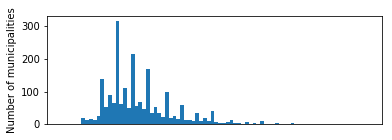

In [5]:
histplot=pob.hist(column="ALQTBID12_M_VC_"+str(i),bins=80,figsize=(6,2),grid=False)
# plot of the histogram of number of municipalities in terms of the rent
plt.xlabel("")
plt.ylabel("Number of municipalities")
plt.xticks([])
plt.title("")
# labeling, titles, and elimination of xtics (they are in the other plot and both will be merged)
plt.savefig("2020histplot.png",dpi=500)
# saving of the plot

In [6]:
R=pob.corr()
print(R)
# computation of the correlation coeficient. The used value is the log_pob20 & ALQTBID12_M_VC_20 one

                   ALQTBID12_M_VC_15  ALQTBID12_M_VC_16  ALQTBID12_M_VC_17  \
ALQTBID12_M_VC_15           1.000000           0.984905           0.980409   
ALQTBID12_M_VC_16           0.984905           1.000000           0.985806   
ALQTBID12_M_VC_17           0.980409           0.985806           1.000000   
ALQTBID12_M_VC_18           0.974909           0.978828           0.985607   
ALQTBID12_M_VC_19           0.969254           0.971898           0.978927   
ALQTBID12_M_VC_20           0.965932           0.968213           0.975190   
log_pob20                   0.410586           0.413342           0.416298   

                   ALQTBID12_M_VC_18  ALQTBID12_M_VC_19  ALQTBID12_M_VC_20  \
ALQTBID12_M_VC_15           0.974909           0.969254           0.965932   
ALQTBID12_M_VC_16           0.978828           0.971898           0.968213   
ALQTBID12_M_VC_17           0.985607           0.978927           0.975190   
ALQTBID12_M_VC_18           1.000000           0.986327        